___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [10]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv(r'diabetes.csv')

In [12]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
pip install scikit-learn==1.2.0

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 393.8 kB/s eta 0:00:21
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB 804.6 kB/s eta 0:00:11
      --------------------------------------- 0.2/8.3 MB 327.7 kB/s eta 0:00:25
      --------------------------------------- 0.2/8.3 MB 3

  You can safely remove it manually.


In [19]:
model.add(Dense(1, activation='sigmoid'))

In [17]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 0.8445 - accuracy: 0.3631
Epoch 2/200
6/6 [==============================] - 0s 926us/step - loss: 0.8292 - accuracy: 0.3669
Epoch 3/200
6/6 [==============================] - 0s 998us/step - loss: 0.8149 - accuracy: 0.3762
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.3873
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7882 - accuracy: 0.4022
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.4171
Epoch 7/200
6/6 [==============================] - 0s 911us/step - loss: 0.7644 - accuracy: 0.4227
Epoch 8/200
6/6 [==============================] - 0s 665us/step - loss: 0.7531 - accuracy: 0.4432
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.4655
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.4823
Epoch 11/200
6/6 [===

6/6 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7691
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7691
Epoch 86/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7691
Epoch 87/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7691
Epoch 88/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7709
Epoch 89/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7709
Epoch 90/200
6/6 [==============================] - 0s 768us/step - loss: 0.5003 - accuracy: 0.7709
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7728
Epoch 92/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7728
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7747
Epoch 94/200
6/6 [=============

6/6 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.7803
Epoch 167/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7803
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7821
Epoch 169/200
6/6 [==============================] - 0s 937us/step - loss: 0.4682 - accuracy: 0.7821
Epoch 170/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7821
Epoch 171/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7821
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7840
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7840
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7840
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7840
Epoch 176/200
6/6 [===

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

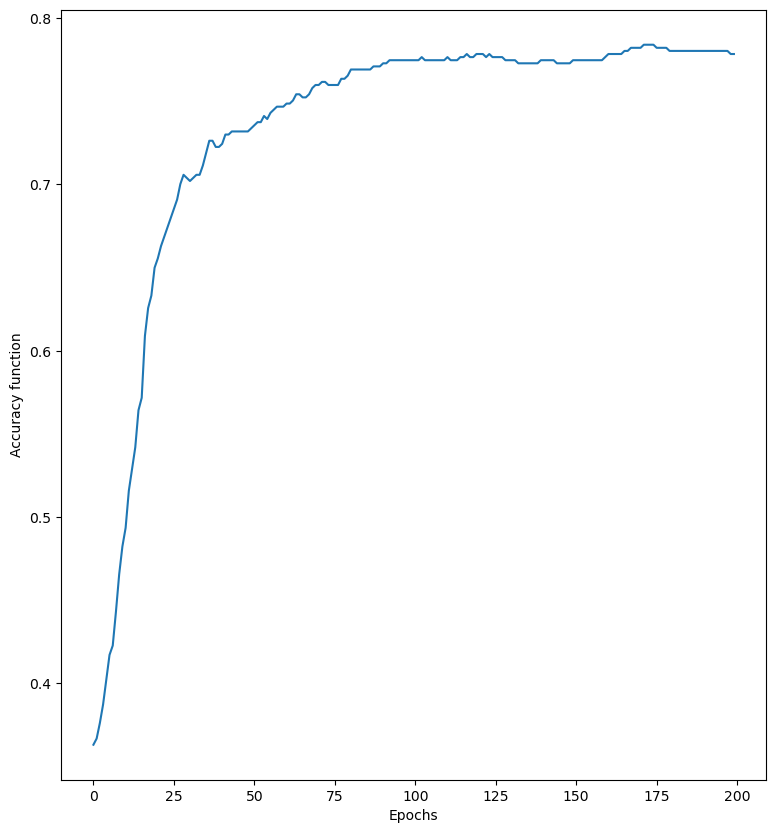

In [20]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [21]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 869us/step


In [22]:
Y_pred

array([[0.56436473],
       [0.5310048 ],
       [0.5305696 ],
       [0.5641268 ],
       [0.62219024],
       [0.6007174 ],
       [0.514368  ],
       [0.61207384],
       [0.63206154],
       [0.661062  ],
       [0.5520451 ],
       [0.6746105 ],
       [0.6045479 ],
       [0.58379245],
       [0.51942074],
       [0.58008534],
       [0.5226307 ],
       [0.51998085],
       [0.65421003],
       [0.6254575 ],
       [0.544612  ],
       [0.52116174],
       [0.60354716],
       [0.5222063 ],
       [0.6412376 ],
       [0.6802099 ],
       [0.52613   ],
       [0.5174541 ],
       [0.5531231 ],
       [0.5292844 ],
       [0.67853683],
       [0.6730244 ],
       [0.6779547 ],
       [0.6511383 ],
       [0.63731474],
       [0.6738813 ],
       [0.60662013],
       [0.5525491 ],
       [0.62114817],
       [0.61690795],
       [0.5187158 ],
       [0.62050676],
       [0.6133073 ],
       [0.59938616],
       [0.51763046],
       [0.6511482 ],
       [0.6387706 ],
       [0.537

In [23]:
Y_prob

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [24]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.350 	 0.350 	 1.000
  Test 	 0.346 	 0.346 	 1.000


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [1]:
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
from scikeras.wrappers import KerasClassifier

In [3]:
from tensorflow.keras.optimizers import SGD

In [8]:
#Librerías
import pandas as pd
from sklearn import datasets

In [5]:
from keras.utils import to_categorical
from keras.models import Sequential


In [42]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [6]:
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [7]:
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [9]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [13]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [14]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [16]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='binary_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 196ms/step - loss: 0.8394 - accuracy: 0.3083 - val_loss: 0.6389 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 22ms/step - loss: 0.6458 - accuracy: 0.2833 - val_loss: 0.6067 - val_accuracy: 0.3667
Epoch 3/200
2/2 [==============================] - 0s 45ms/step - loss: 0.6147 - accuracy: 0.3250 - val_loss: 0.5876 - val_accuracy: 0.3667
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 0.5969 - accuracy: 0.3250 - val_loss: 0.5690 - val_accuracy: 0.3667
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 0.5792 - accuracy: 0.3250 - val_loss: 0.5469 - val_accuracy: 0.3667
Epoch 6/200
2/2 [==============================] - 0s 35ms/step - loss: 0.5611 - accuracy: 0.3250 - val_loss: 0.5204 - val_accuracy: 0.4000
Epoch 7/200
2/2 [==============================] - 0s 34ms/step - loss: 0.5343 - accuracy: 0.3750 - val_loss: 0.5003 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 30ms/step - loss: 0.2411 - accuracy: 0.9500 - val_loss: 0.2509 - val_accuracy: 0.8667
Epoch 60/200
2/2 [==============================] - 0s 34ms/step - loss: 0.2453 - accuracy: 0.9500 - val_loss: 0.2394 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 39ms/step - loss: 0.2387 - accuracy: 0.9333 - val_loss: 0.2543 - val_accuracy: 0.8000
Epoch 62/200
2/2 [==============================] - 0s 41ms/step - loss: 0.2523 - accuracy: 0.8750 - val_loss: 0.2753 - val_accuracy: 0.8667
Epoch 63/200
2/2 [==============================] - 0s 23ms/step - loss: 0.2566 - accuracy: 0.9500 - val_loss: 0.2471 - val_accuracy: 0.9000
Epoch 64/200
2/2 [==============================] - 0s 32ms/step - loss: 0.2308 - accuracy: 0.9583 - val_loss: 0.2453 - val_accuracy: 0.9667
Epoch 65/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2370 - accuracy: 0.9667 - val_loss: 0.2341 - val_accuracy: 0.8667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 40ms/step - loss: 0.1255 - accuracy: 0.9583 - val_loss: 0.0840 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0765 - accuracy: 0.9750 - val_loss: 0.0868 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0767 - accuracy: 0.9833 - val_loss: 0.1233 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1225 - accuracy: 0.9417 - val_loss: 0.1230 - val_accuracy: 0.9000
Epoch 121/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0898 - accuracy: 0.9583 - val_loss: 0.1313 - val_accuracy: 0.8667
Epoch 122/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0974 - accuracy: 0.9583 - val_loss: 0.0954 - val_accuracy: 0.9667
Epoch 123/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0816 - accuracy: 0.9750 - val_loss: 0.1094 - val_accuracy: 0.9000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0601 - accuracy: 0.9583 - val_loss: 0.0742 - val_accuracy: 0.9667
Epoch 176/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0534 - accuracy: 0.9667 - val_loss: 0.0711 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 54ms/step - loss: 0.0549 - accuracy: 0.9750 - val_loss: 0.0785 - val_accuracy: 0.9333
Epoch 178/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0549 - accuracy: 0.9750 - val_loss: 0.0631 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0661 - accuracy: 0.9833 - val_loss: 0.2009 - val_accuracy: 0.8667
Epoch 180/200
2/2 [==============================] - 0s 50ms/step - loss: 0.1145 - accuracy: 0.9250 - val_loss: 0.0684 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0733 - accuracy: 0.9667 - val_loss: 0.0561 - val_accuracy: 0.9667
Epoch 

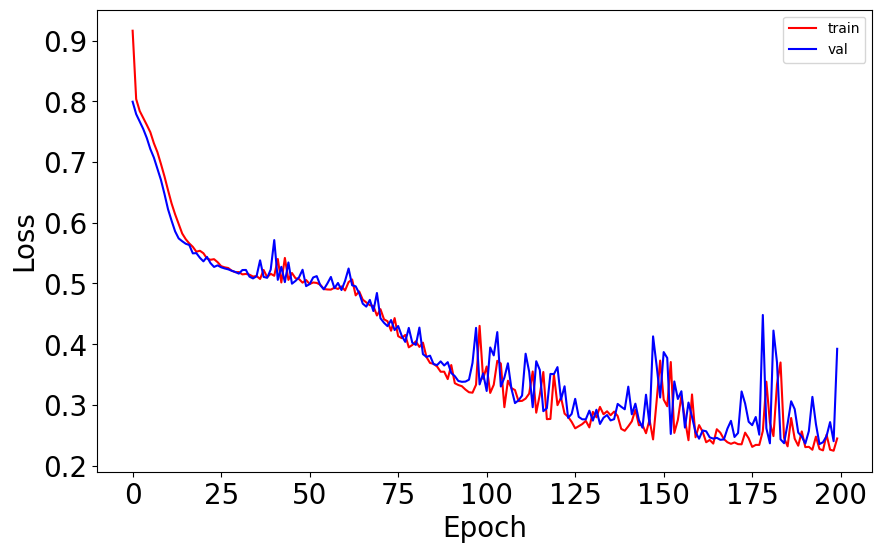

In [17]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [18]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 30ms/step


In [19]:
Y_pred

array([[8.44751241e-07, 9.99979734e-01, 1.94809163e-05],
       [9.99992251e-01, 7.72679869e-06, 1.13081387e-12],
       [4.64581690e-18, 5.84578608e-10, 1.00000000e+00],
       [1.56452450e-06, 9.99945521e-01, 5.29575045e-05],
       [5.14937938e-07, 9.99988556e-01, 1.09343000e-05],
       [9.99974966e-01, 2.50689172e-05, 1.21016157e-11],
       [3.68747948e-04, 9.99618292e-01, 1.29884284e-05],
       [2.76512765e-07, 6.96868956e-01, 3.03130805e-01],
       [8.46756336e-07, 9.75983679e-01, 2.40155440e-02],
       [5.29947320e-05, 9.99928236e-01, 1.87440310e-05],
       [5.32564343e-07, 9.40454006e-01, 5.95454387e-02],
       [9.99958038e-01, 4.19483695e-05, 7.31581254e-11],
       [9.99998212e-01, 1.82850260e-06, 4.51595738e-13],
       [9.99954224e-01, 4.57354145e-05, 6.10195366e-11],
       [9.99994874e-01, 5.15981174e-06, 1.31178304e-12],
       [1.45940248e-06, 9.99991655e-01, 6.93442917e-06],
       [3.13063009e-12, 1.41113496e-05, 9.99985933e-01],
       [2.79439773e-05, 9.99937

In [20]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [21]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [22]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [23]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 22ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.950 	 0.953 	 0.950
  Test 	 0.867 	 0.908 	 0.867
